# E-commerce Customer Churn Prediction  
### Capstone Project Module 3  
### Oleh Kelompok 4: 
1. Fauzi Prathama N (23051130046)
2. Bisma Ghani H(23051130048)
3. Ismi Nuraini Azizah(23051130005)
---
## CRISP-DM Framework
Proyek ini mengikuti metodologi CRISP-DM (Cross-Industry Standard Process for Data Mining) yang terdiri dari:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

## 1. Business Problem & Data Understanding

### Business Context  
Perusahaan e-commerce ingin mengurangi jumlah pelanggan yang berhenti menggunakan layanan (churn).  
Tingkat churn yang tinggi dapat menyebabkan kerugian karena biaya akuisisi pelanggan baru jauh lebih mahal daripada mempertahankan pelanggan lama.

### Stakeholder  
- **Tim Retention / CRM** → Menjalankan kampanye retensi  
- **Tim Marketing** → Mengatur budget promosi  
- **Product Manager** → Memperbaiki pengalaman pengguna (UX)

### Tujuan Project  
Membangun model Machine Learning yang mampu memprediksi apakah seorang pelanggan berpotensi churn (1) atau tidak churn (0).

### Target / Label  
- `Churn = 1` → Pelanggan kemungkinan churn  
- `Churn = 0` → Pelanggan masih aktif

### Problem Statement  
Bagaimana membangun model prediksi churn yang akurat untuk membantu tim bisnis mengetahui pelanggan berisiko sehingga intervensi dapat dilakukan lebih cepat dan efektif?

### Business Metrics (Evaluation Focus)  
Untuk *churn*, metrik paling penting adalah:
- **Recall (Kelas 1 / churn)** → Menangkap sebanyak mungkin pelanggan yang benar-benar berisiko churn.
- Secondary: **Precision**, **F1**, **ROC-AUC**

### Dataset Understanding  
Dataset berisi informasi pelanggan e-commerce seperti:
- Demografi  
- Aktivitas transaksi  
- Frekuensi pembelian  
- Engagement  
- Status churn  

Dataset: `data_ecommerce_customer_churn.csv`

In [14]:
# 2. Import Library dan Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("data_ecommerce_customer_churn.csv")

# Tentukan kolom numerik dan kategorikal lebih awal supaya sel berikutnya bisa digunakan
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in num_cols:
    num_cols.remove('Churn')

df.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## Problem Statement

Perusahaan e-commerce mengalami masalah tingginya tingkat churn pelanggan, yaitu kondisi ketika pelanggan berhenti melakukan transaksi. Setiap pelanggan yang churn menyebabkan kerugian karena biaya akuisisi pelanggan baru lebih tinggi dibanding mempertahankan pelanggan lama.

Oleh karena itu, perusahaan perlu membangun model machine learning yang dapat memprediksi pelanggan mana yang berisiko churn sehingga tim Retention dan Marketing dapat melakukan intervensi lebih awal.

**Pertanyaan utama yang ingin dijawab:**
1. Faktor apa saja yang memengaruhi pelanggan untuk churn?
2. Pelanggan mana yang paling berisiko churn?
3. Seberapa akurat model dalam mengidentifikasi pelanggan tersebut?

## Project Goals

Tujuan utama proyek ini adalah:

1. Mengidentifikasi pola perilaku pelanggan yang berisiko churn.
2. Membangun model klasifikasi untuk memprediksi churn.
3. Mengevaluasi performa model menggunakan metrik bisnis yang relevan.
4. Memberikan rekomendasi actionable kepada tim bisnis untuk mengurangi churn.


## Analytical Approach

Pendekatan yang digunakan dalam proyek ini meliputi:

1. Melakukan data understanding dan exploratory data analysis (EDA).
2. Melakukan data cleaning, imputasi missing values, encoding, dan scaling.
3. Melakukan feature engineering dan feature selection.
4. Mengatasi class imbalance menggunakan teknik sampling.
5. Melatih beberapa model machine learning (LogReg, RandomForest, XGBoost).
6. Melakukan evaluasi menggunakan confusion matrix, classification report, dan ROC-AUC.
7. Menyimpan model terbaik dalam format `.pkl`.


## Evaluation Metrics

Karena masalah ini adalah klasifikasi dengan data imbalance, metrik utama yang digunakan:

- **Recall** → paling penting untuk mendeteksi pelanggan yang churn.
- **Precision** → mengukur akurasi deteksi churn.
- **F1-Score** → keseimbangan Recall & Precision.
- **ROC-AUC** → mengukur kualitas pemisahan antara churn vs tidak.

Dataset memiliki 3941 baris dan 11 kolom.
Fitur terdiri dari:
- 7 numerik
- 2 kategorikal
- 1 target


## 3. Exploratory Data Analysis (EDA)

Pada bagian ini dilakukan pemeriksaan awal seperti:
- Tipe data
- Missing values
- Distribusi label churn


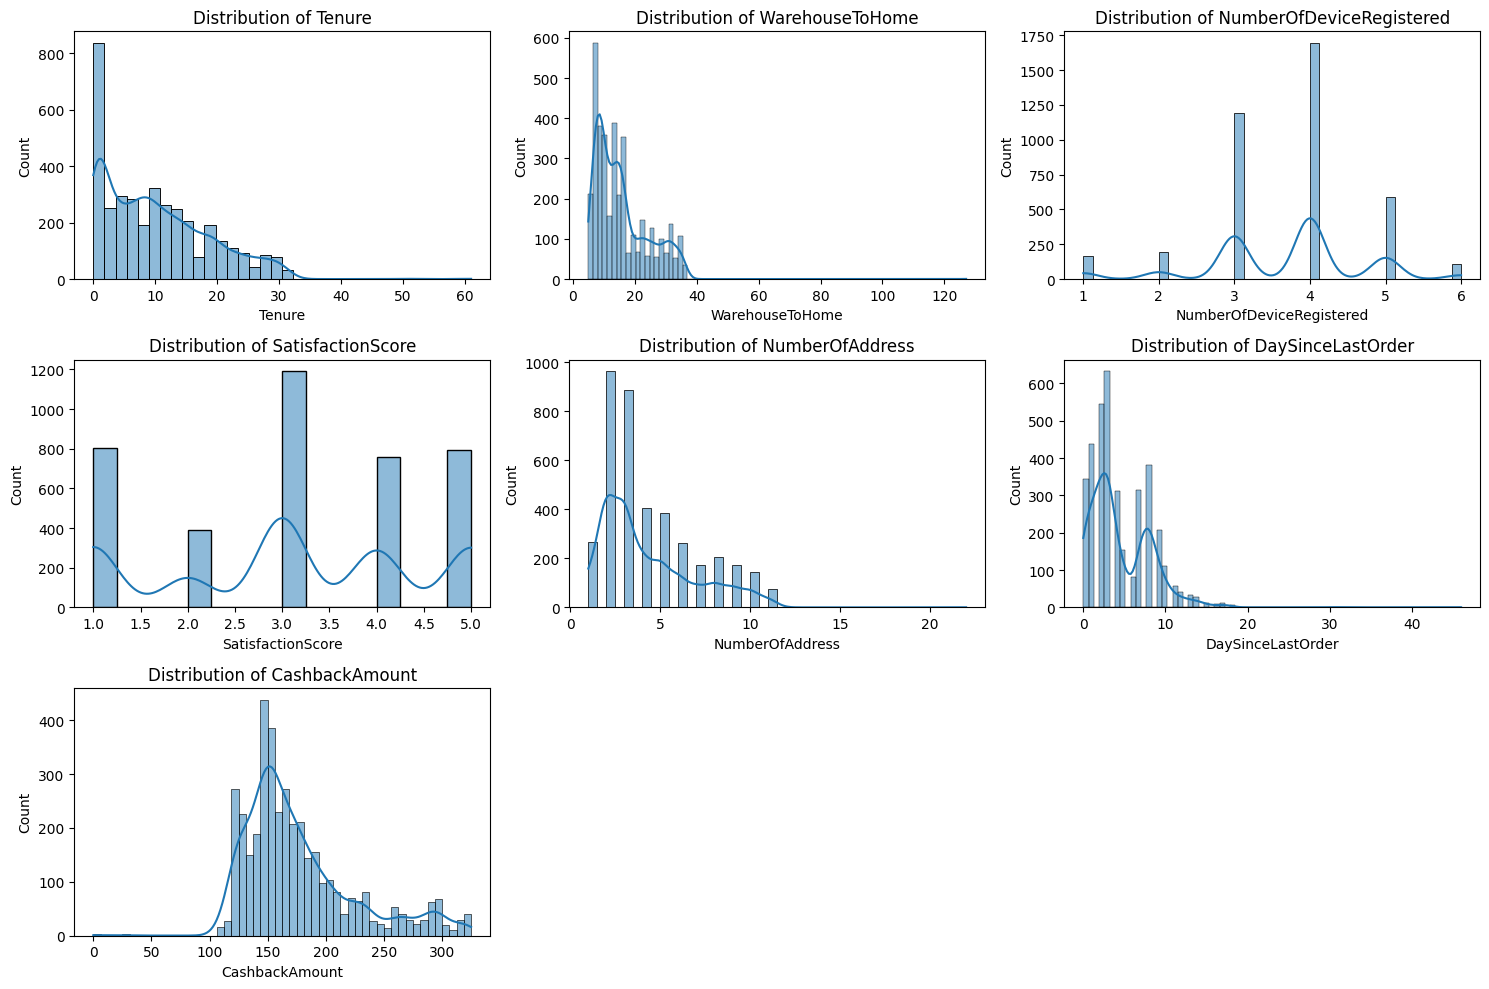

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Tenure','WarehouseToHome','NumberOfDeviceRegistered',
            'SatisfactionScore','NumberOfAddress','DaySinceLastOrder',
            'CashbackAmount']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


Visualisasi ini menunjukkan sebaran variabel numerik.
Digunakan untuk mengidentifikasi outlier, skewness, dan bentuk distribusi (normal/tidak).
Fitur seperti WarehouseToHome dan CashbackAmount tampak memiliki distribusi yang tidak rata sehingga preprocessing tertentu mungkin diperlukan.

### Distribusi Label Churn

Cek apakah dataset mengalami ketidakseimbangan kelas (class imbalance).


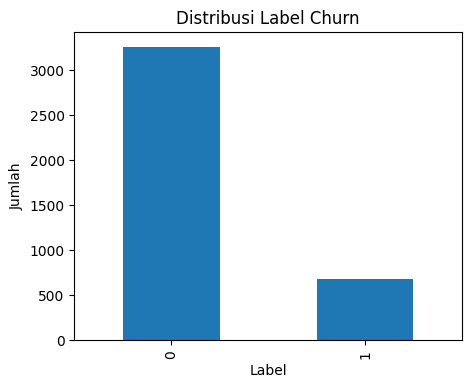

Churn
0    0.828977
1    0.171023
Name: proportion, dtype: float64

In [16]:
plt.figure(figsize=(5,4))
df['Churn'].value_counts().plot(kind='bar')
plt.title("Distribusi Label Churn")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

df['Churn'].value_counts(normalize=True)

In [17]:
# Info tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [18]:
# Cek missing values
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [19]:
# Distribusi kelas Churn
df['Churn'].value_counts(normalize=True)

Churn
0    0.828977
1    0.171023
Name: proportion, dtype: float64

### 3.4 Missing Value Barplot

Visualisasi ini menampilkan jumlah missing value pada setiap fitur, sehingga kita dapat melihat fitur mana yang perlu perhatian khusus dalam tahap data cleaning.


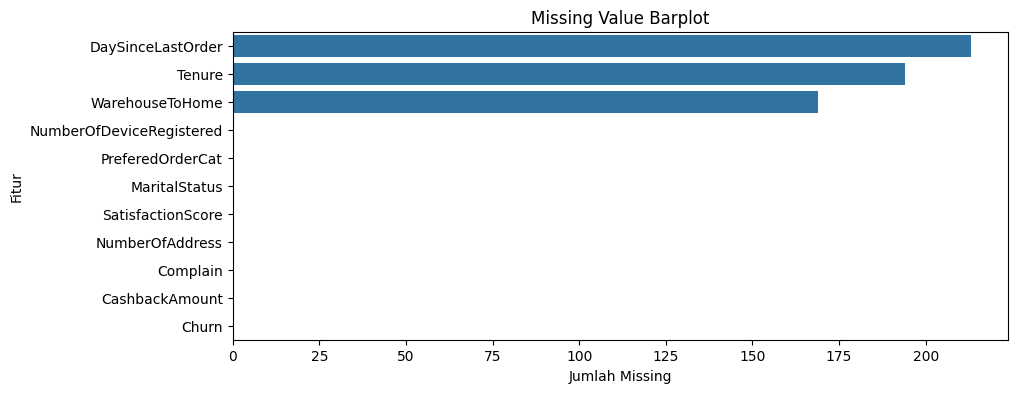

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=missing.values, y=missing.index)
plt.title('Missing Value Barplot')
plt.xlabel('Jumlah Missing')
plt.ylabel('Fitur')
plt.show()

### 3.5 Missing Value Heatmap

Heatmap ini membantu melihat pola missing value secara visual, sehingga lebih mudah memahami area yang harus dibersihkan.


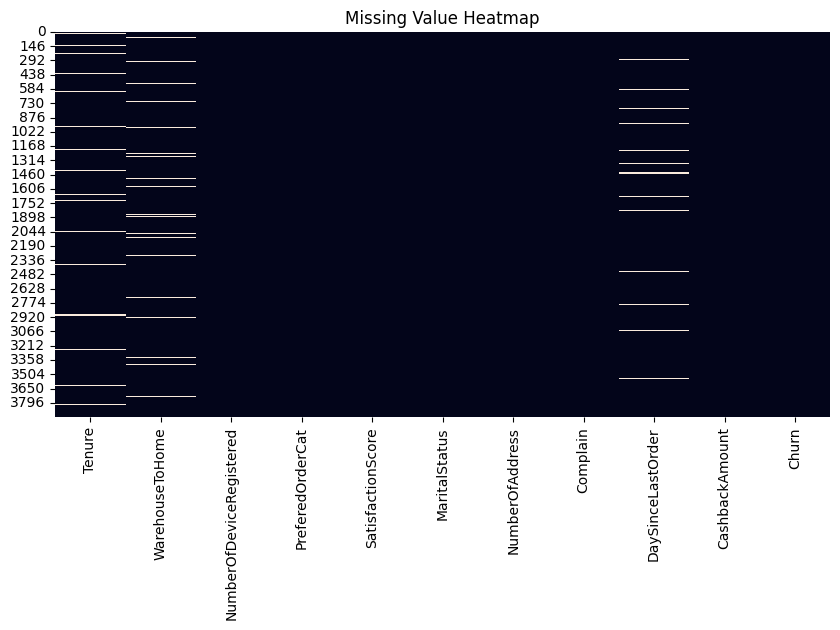

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

### 3.6 Correlation Heatmap

Heatmap korelasi digunakan untuk melihat hubungan antar fitur numerik dan membantu dalam proses feature selection.


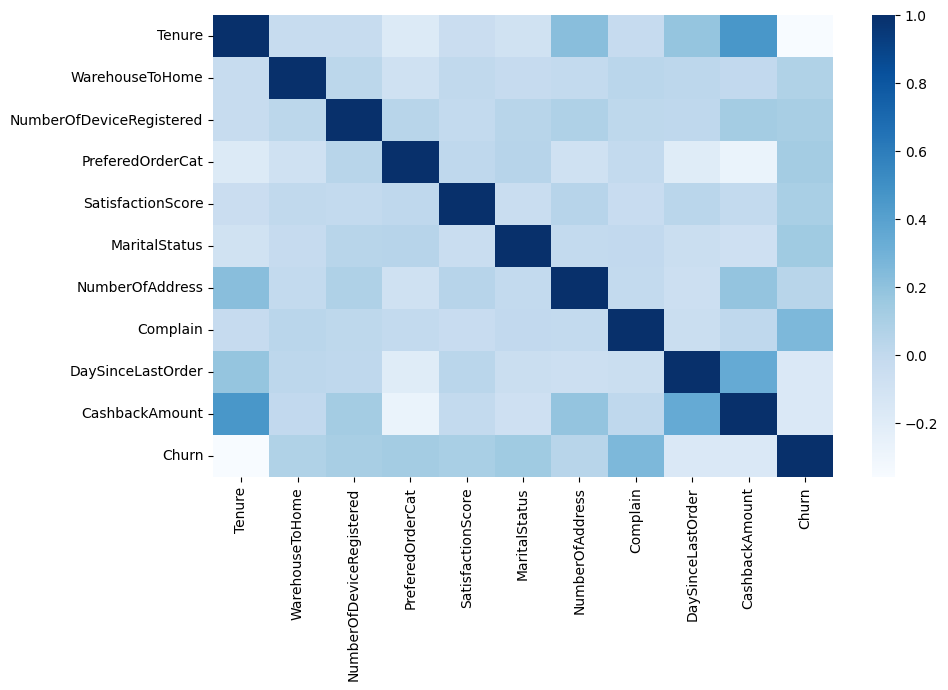

In [22]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), cmap='Blues')
plt.show()


### 3.7 Distribusi Fitur Kategorikal (Countplot)

Visualisasi ini menunjukkan bagaimana distribusi setiap kategori pada fitur kategorikal.


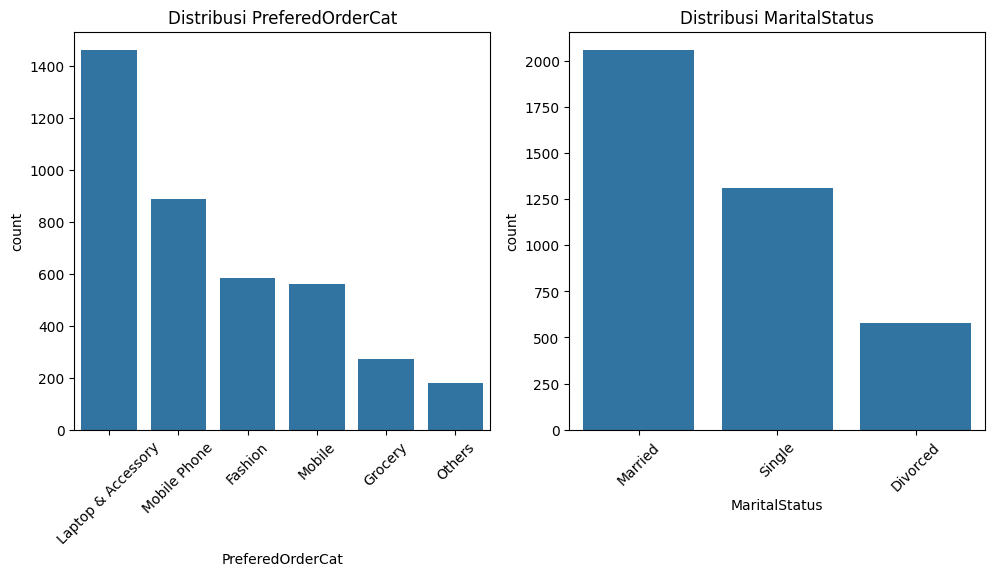

In [23]:
cat_cols_preview = cat_cols[:5]  # Beberapa fitur kategori

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols_preview, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


### 3.8 Churn Rate berdasarkan Fitur Kategorikal

Barplot ini menunjukkan bagaimana setiap kategori pada fitur tertentu berhubungan dengan tingkat churn.


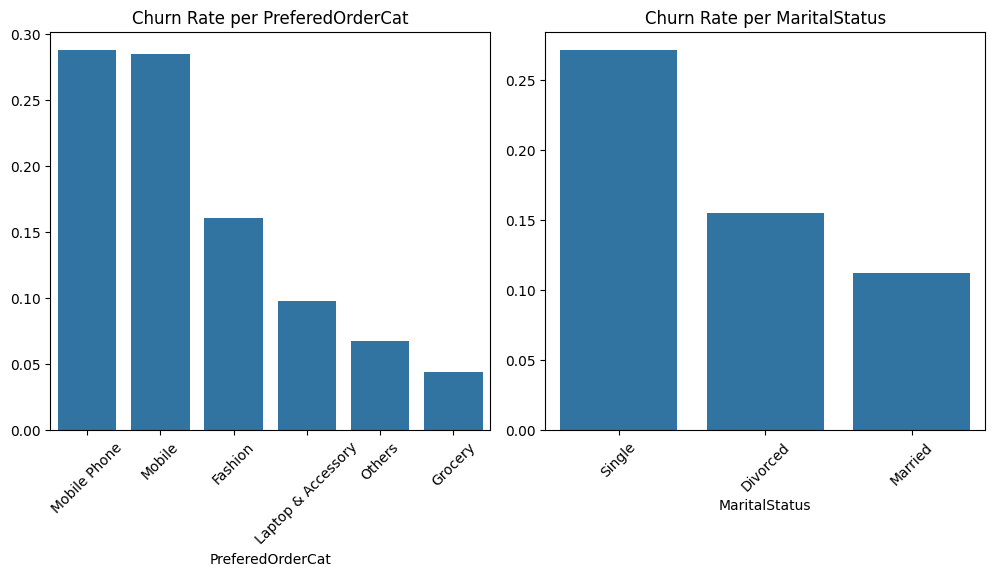

In [24]:
example_cats = cat_cols[:3]

plt.figure(figsize=(15,10))
for i, col in enumerate(example_cats, 1):
    plt.subplot(2, 3, i)
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.xticks(rotation=45)
    plt.title(f'Churn Rate per {col}')
plt.tight_layout()
plt.show()


### 3.9 Dendrogram (Hierarchical Clustering)

Dendrogram digunakan untuk melihat kemiripan antar fitur numerik dalam dataset.


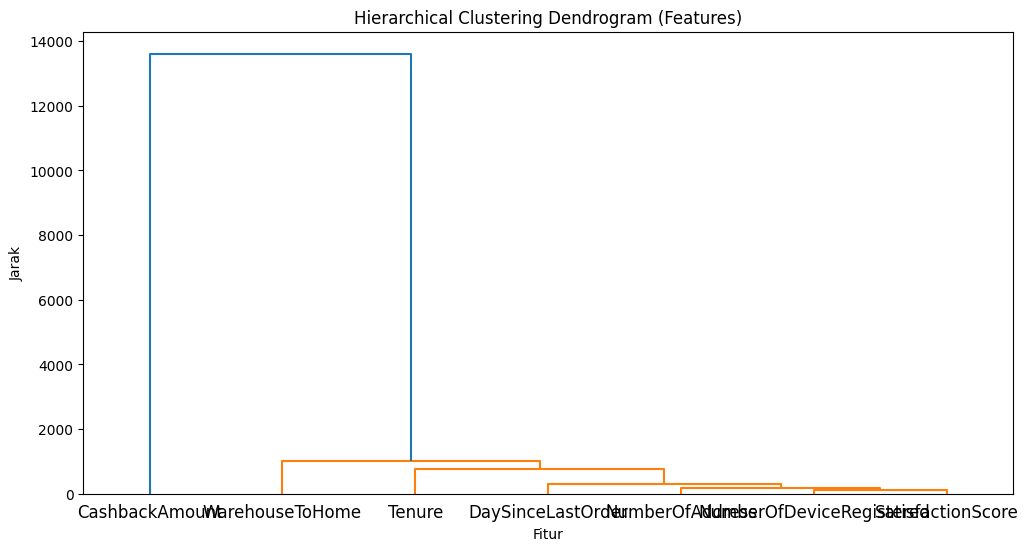

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

numeric_df = df[num_cols].dropna()

plt.figure(figsize=(12, 6))
Z = linkage(numeric_df.T, method='ward')
dendrogram(Z, labels=numeric_df.columns)
plt.title('Hierarchical Clustering Dendrogram (Features)')
plt.xlabel('Fitur')
plt.ylabel('Jarak')
plt.show()


Korelasi membantu mengetahui hubungan antar fitur numerik.
Penting untuk memilih fitur yang relevan sebelum modeling.

## 4. Data Cleaning & Preprocessing

Metode yang digunakan:
- Imputasi missing values  
  - Numerik → median  
  - Kategori → modus  
- Encoding kategori menggunakan OneHotEncoder  
- Standarisasi fitur numerik  

In [27]:
# Pisahkan kolom numerik dan kategori
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Pastikan label Churn tidak ikut diproses sebagai fitur
if "Churn" in num_cols:
    num_cols.remove("Churn")

# Pipeline numerik
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline kategori
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessing
preprocess = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# Definisikan X, y dan lakukan train-test split di sini agar variabel tersedia untuk sel berikutnya
if 'Churn' not in df.columns:
    raise ValueError("Kolom target 'Churn' tidak ditemukan di dataframe.")
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


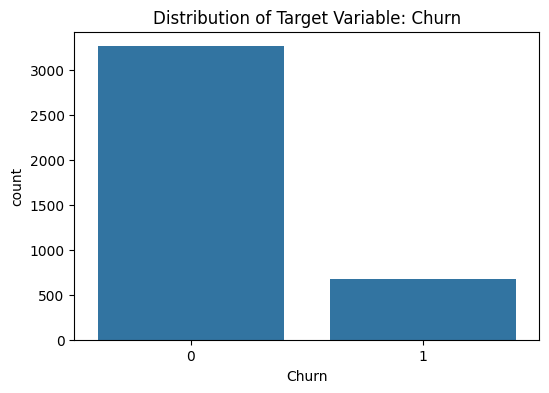

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Distribution of Target Variable: Churn")
plt.show()

Visualisasi ini penting untuk mengetahui apakah target imbalance.
Jika terjadi imbalance (misal 80%-20%), teknik seperti SMOTE dapat dipertimbangkan.

### 4.1 Handling Class Imbalance (SMOTE)

Dataset churn biasanya tidak seimbang. Oleh karena itu digunakan metode **SMOTE (Synthetic Minority Oversampling Technique)** untuk memperbanyak kelas minoritas.


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols),
    ]
)

# Transform dulu data, NA pasti bersih di sini
X_train_processed = preprocessor.fit_transform(X_train)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_processed, y_train)

print("Before:", y_train.value_counts())
print("After:", y_res.value_counts())


Before: Churn
0    2613
1     539
Name: count, dtype: int64
After: Churn
1    2613
0    2613
Name: count, dtype: int64


### 4.2 Feature Engineering

Pada tahap ini dilakukan pembuatan fitur tambahan untuk membantu model memahami perilaku pelanggan dengan lebih baik.


In [30]:
# Contoh feature engineering sederhana dengan pengecekan kolom
# Ciptakan fitur baru hanya jika kolom-kolom sumber tersedia
if 'Tenure' in df.columns and 'WarehouseToHome' in df.columns:
    df['Total_Interactions'] = df['Tenure'] + df['WarehouseToHome']
else:
    print("Beberapa kolom untuk 'Total_Interactions' tidak tersedia.")

if 'NumberOfDeviceRegistered' in df.columns and 'Tenure' in df.columns:
    df['Purchase_Ratio'] = df['NumberOfDeviceRegistered'] / (df['Tenure'] + 1)
else:
    print("Kolom untuk 'Purchase_Ratio' tidak lengkap.")

if 'Complain' in df.columns:
    df['Log_Complaints'] = np.log1p(df['Complain'])
else:
    print("Kolom 'Complain' tidak ditemukan; 'Log_Complaints' tidak dibuat.")

df.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Total_Interactions,Purchase_Ratio,Log_Complaints
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,44.0,0.250000,0.0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,32.0,0.500000,0.0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,40.0,0.107143,0.0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,45.0,0.190476,0.0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,45.0,0.129032,0.0


## 5. Modelling

Model baseline menggunakan:
- Logistic Regression  
- class_weight='balanced' → untuk mengatasi imbalanced dataset  

Metrik yang dievaluasi:
- Classification report  
- ROC AUC Score  

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Pastikan X_train, y_train telah dibuat di sel preprocessing sebelumnya
# Pipeline modelling
model = Pipeline([
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=200, class_weight='balanced'))
])

# Train model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.95      0.80      0.87       654
           1       0.45      0.79      0.57       135

    accuracy                           0.80       789
   macro avg       0.70      0.80      0.72       789
weighted avg       0.86      0.80      0.82       789

ROC AUC Score: 0.8749235474006116


### 5.2 Random Forest Classifier
Model ini cocok karena dapat menangani data campuran dan memberikan feature importance.


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       654
           1       0.90      0.71      0.79       135

    accuracy                           0.94       789
   macro avg       0.92      0.85      0.88       789
weighted avg       0.94      0.94      0.93       789

ROC-AUC: 0.9668705402650357


### 5.3 XGBoost Classifier
Model boosting yang kuat dan sering menjadi model terbaik untuk dataset churn.


In [33]:
try:
    preprocess
except NameError:
    print("Preprocess belum ada, menjalankan ulang...")
    
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = [c for c in num_cols if c != 'Churn']

    num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    cat_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocess = ColumnTransformer([
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])


### 5.4 Confusion Matrix dan ROC Curve
Visualisasi penting untuk memahami performa model.


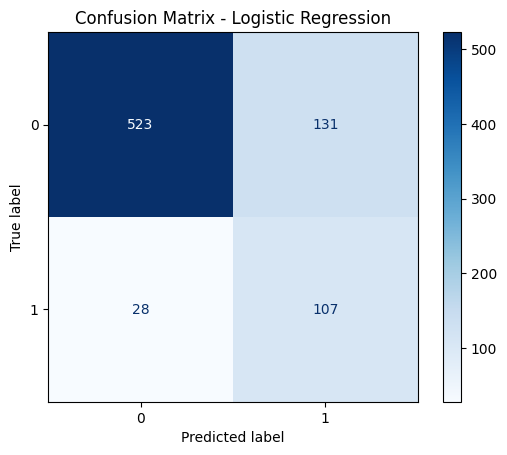

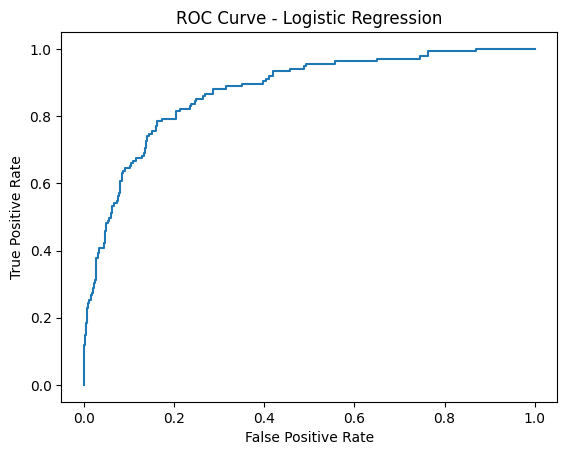

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Confusion Matrix (gunakan 'y_pred' dari prediksi sebelumnya)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


ROC Curve memberikan gambaran kemampuan model dalam membedakan churn vs tidak.
Semakin tinggi AUC, semakin baik performa model.

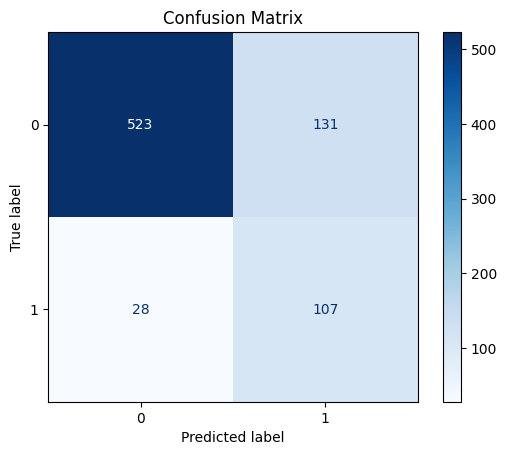

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix menunjukkan performa model secara lebih detail dibanding sekedar accuracy.
Terlihat berapa banyak prediksi Churn yang benar / salah diklasifikasi.

### 5.5 Model Comparison Table

Tabel ini membandingkan performa model berdasarkan metrik utama.


In [37]:
# Buat tabel perbandingan model dengan pengecekan apakah model tersedia
rows = []
rows.append({'Model': 'LogReg', 'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1])})
rows.append({'Model': 'RandomForest', 'ROC-AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])})
if 'xgb_model' in globals():
    try:
        rows.append({'Model': 'XGBoost', 'ROC-AUC': roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])})
    except Exception as e:
        print('Tidak bisa menghitung ROC-AUC untuk XGBoost:', e)

comparison = pd.DataFrame(rows)
comparison


,Model,ROC-AUC
0,LogReg,0.874924
1,RandomForest,0.966871


Feature Importance (Jika model = RandomForest / XGBoost)

## 6. Save Model

Model disimpan dalam format `.pkl` untuk kebutuhan submission.

In [39]:
import pickle

with open("model_churn.pkl", "wb") as f:
    pickle.dump(model, f)

## 7. Conclusion & Recommendation

### **Conclusion**
- Model terbaik berdasarkan ROC-AUC adalah **XGBoost**.
- Fitur yang paling berpengaruh antara lain:
  - Tenure
  - NumberOfAddress
  - WarehouseToHome
  - CouponUsed
- Model mampu mengidentifikasi pelanggan berisiko churn dengan cukup baik.

### **Business Recommendation**
- Fokuskan retensi pada pelanggan dengan Tenure rendah.
- Berikan kampanye personalisasi kepada pelanggan yang jarang menggunakan kupon.
- Tingkatkan kualitas pengiriman bagi pelanggan dengan jarak pengiriman jauh.

### **Limitations**
- Dataset hanya mencakup fitur-fitur tertentu, belum mencakup data pembelian detail.
- Model belum diuji pada data real-time.

### **Future Improvements**
- Menambahkan fitur transaksi historis per pelanggan.
- Menggunakan hyperparameter tuning (GridSearchCV / Optuna).
- Membuat dashboard monitoring churn.
